In [0]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Para vincular con el Drive:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir("/content/drive/My Drive/ODSL")

# para acceder a la carpeta, en el siguiente link: 
# https://drive.google.com/drive/folders/1NitzdszUOLmGhHQxlZvybIDHNLl_b8bh?usp=sharing

In [0]:
!ls

Grid_7-last_date_31-10-19.csv  ODSL5.ipynb


In [0]:
plato=pd.read_csv('Grid_7-last_date_31-10-19.csv',index_col='Fecha', parse_dates=True)
plato.head()

,#res.glob,#rescate,Kilos,Duración,Solicitante,dirección retiro,Rescatistas,Puntos Retiro,Entregas,dirección entrega,Comentarios,Tipo,Fotos,Ciudad,Tipo de alimento
Fecha,,,,,,,,,,,,,,,
2019-10-31,2739-Mon,2739,40.0,NaN,Pagnifique,Shopping La Tahona Plaza,Lorens Pignatta,El Almacén,"""""""Comedor Cristiano Comunitario """"""""LA CRUZ D...",NaN,NaN,NaN,rescate #2739 photo 1.jpg (https://dl.airtable...,Montevideo,"Frutas, verduras, panificados"
2019-10-31,2738-Mon,2738,8.0,NaN,Pagnifique,Av Lezica 6345,Santiago Di Servi,Ta-Ta 322 Lezica,Oratorio La Tablada,"Juan P. Lamolle 1639, esq Antonio Rubio",NaN,NaN,rescate #2738 photo 1.jpg (https://dl.airtable...,Montevideo,Pan y bizcochos
2019-10-31,2737-Mon,2737,4.0,NaN,Pagnifique,NaN,Rebeca,NaN,Comedor y Merendero Siglo XXI,NaN,NaN,NaN,rescate #2737 photo 1.jpg (https://dl.airtable...,Montevideo,Pan y bizcochos
2019-10-31,2736-Mon,2736,11.0,NaN,Pagnifique,Tata 311 Belloni 4393 / Tata 325 Gral Flores 5493,Ana y Yamandu,Ta-Ta Piedras Blancas,Merendero Nuevo Amanecer,San Cono 3981 Montevideo,NaN,NaN,rescate #2736 photo 1.jpg (https://dl.airtable...,Montevideo,Pan y bizcochos
2019-10-31,2735-Mon,2735,7.0,NaN,Pagnifique,Tata Las Piedras Artigas 810 /\nTata Las Piedr...,Pastora Marisa Mendonza,Ta-Ta Las Piedras,Merendero Camino a Jerusalen,Calle Rondeau Mza 48 S 13 Las Piedras,NaN,NaN,rescate #2735 photo 1.jpg (https://dl.airtable...,Montevideo,Pan y bizcochos


Para ver que clase de datos tenemos:

In [0]:
plato.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4202 entries, 2019-10-31 to 2017-08-28
Data columns (total 15 columns):
#res.glob            4202 non-null object
#rescate             4202 non-null int64
Kilos                4202 non-null float64
Duración             333 non-null object
Solicitante          4198 non-null object
dirección retiro     3224 non-null object
Rescatistas          4150 non-null object
Puntos Retiro        4141 non-null object
Entregas             4182 non-null object
dirección entrega    182 non-null object
Comentarios          166 non-null object
Tipo                 3675 non-null object
Fotos                3900 non-null object
Ciudad               4202 non-null object
Tipo de alimento     2783 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 525.2+ KB


Valores estadísticos de las columnas numéricas:

In [0]:
plato.describe()

,#rescate,Kilos
count,4202.000000,4202.000000
mean,1156.342456,143.665654
std,752.493240,737.611788
min,1.000000,0.000000
25%,526.000000,10.000000
50%,1051.500000,23.000000
75%,1687.750000,50.000000
max,2740.000000,32596.000000


In [0]:
#columnas_descartables = ['Duración','Fotos']
#plato = plato.drop(columns=columnas_descartables)

Por lo siguiente, se podría sugerir una codificación de alimentos:

In [0]:
plato['Tipo de alimento'].value_counts()

Pan y bizcochos                                                                                                                                                                                                     673
Bizcochos y panes                                                                                                                                                                                                   388
Pan y Bizcochos                                                                                                                                                                                                     272
Panes y bizcochos                                                                                                                                                                                                   203
Pan Y bizcochos                                                                                                                         

Se puede ver que el número de registros va aumentando con los años:

In [0]:
plato['year'] = plato.index.year
plato['year'].value_counts(ascending=True)

2013       4
2014      47
2015     181
2016     195
2017     225
2018    1097
2019    2453
Name: year, dtype: int64

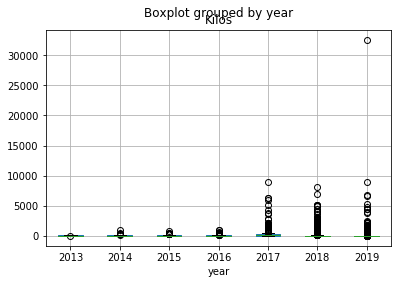

In [0]:
plato.boxplot(column='Kilos',by='year');

In [0]:
plato['month'] = plato.index.month

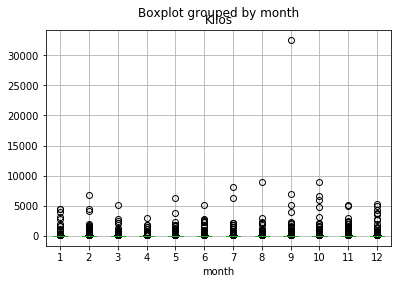

In [0]:
plato.boxplot(column='Kilos',by='month');

Es posible que el outlier máximo de kilos sea un valor mal registrado. No hay tratamiento de outliers todavía.

Si bien hay varias ciudades que conforman la red de Plato Lleno, este dataset consiste en dos ciudades, Montevideo y Buenos Aires.

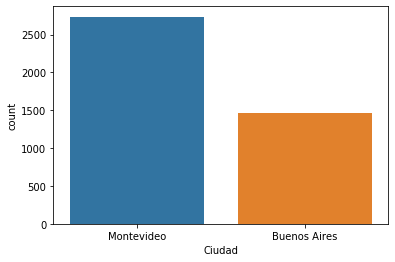

In [0]:
sns.countplot(plato.Ciudad)
plt.show()

In [0]:
plato['Ciudad'].value_counts()

Montevideo      2736
Buenos Aires    1466
Name: Ciudad, dtype: int64

Lo que se hace para Baires se puede hacer tranquilamente para Montevideo

In [0]:
Montevideo=plato[plato['Ciudad'].str.startswith('Montevideo')].copy()

In [0]:
Baires= plato[plato['Ciudad'].str.startswith('Buenos Aires')].sort_values(by=['Solicitante']).copy()

Quizás se podría hacer algo con las direcciones...

In [0]:
Baires['dirección retiro'].unique()

array([nan, 'Conde 101. Palermo\n',
       'Ayacucho 333, C1025AAG CABA, Argentina',
       'Niceto Vega 4866. Palermo',
       'Avenida San Martín 4600. La Paternal', 'Saravi 1799, La Lonja',
       ' L. N. Alem 452. Microcentro.',
       'Marcelo T. de Alvear 787. Microcentro',
       '24 de Noviembre 827. Caballito', 'Juan B. Justo 1425. Béccar',
       'M. Céspedes 1112. Florida', 'La Calandria 465. Villa Adelina ',
       'Olga Cossettini 390. Puerto Madero',
       'Eat Catering S.A, B1611DVE, Gral. Belgrano 2453, B1611DVE Don Torcuato, Buenos Aires',
       'Juan Ramírez de Velasco 1150. Villa Crespo ',
       'Santiago del Estero 1181. Constitución.',
       'Av. Don Pedro de Mendoza 965. La Boca',
       'Don Bosco 99. San Isidro', 'Av. Fondo de La Legua 856. Martínez',
       'Zepita 3251, Barracas',
       'Av. Bernabe Marquez 504, San Isidro, Buenos Aires',
       'José Pascual Tamborini 4641/3 CABA', 'Manuela Pedraza 1633.',
       'Asunción 4430, e/ H. Yrigoyen y Falucho.

In [0]:
Baires['Solicitante'].value_counts()

Grandwich                         244
Mercado Central                   219
Entrebollos                       175
Dow                               145
Eat Catering                       76
                                 ... 
Copetín                             1
Asociación Española San Isidro      1
Marcelo Kohan y Magalí              1
Javier Lopez                        1
Crepas                              1
Name: Solicitante, Length: 165, dtype: int64

Para poder manejar con máscaras la frecuencia de los solicitantes entre ocasionales y frecuentes, se puede agregar la siguiente columna al dataset:

In [0]:
Baires['freq_solicitante'] = Baires.Solicitante.groupby(Baires.Solicitante).transform('count')

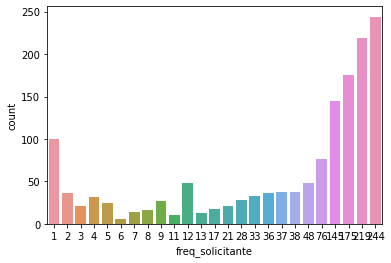

In [0]:
sns.countplot(Baires['freq_solicitante'])
plt.show()

Igual... para determinar si hay un donante frecuente, además de las veces que ha donado, habría que determinar alguna relación con el tiempo.. si continúa por ej o si fue solo un momento.. quizás detectar si se dejó de donar cuál podría ser la razón o si es incipiente y está comenzando a donar de forma regular.. algo así, no sé muy bien como plasmar la idea..

In [0]:
lss_freq =  Baires['freq_solicitante'] < 5
less_than_five=Baires[lss_freq].copy()  
less_than_five['Solicitante'].value_counts()

Tree Cocina (Catering)            4
Grace Café                        4
El Merendungue                    4
Romanoff                          4
FEMSA                             4
                                 ..
Asociación Española San Isidro    1
Marcelo Kohan y Magalí            1
Javier Lopez                      1
Etnika                            1
Crepas                            1
Name: Solicitante, Length: 133, dtype: int64

In [0]:
mtn_once =  Baires['freq_solicitante'] >= 5
more_than_once=Baires[mtn_once].copy()  

In [0]:
more_than_once['Solicitante'].value_counts()

Grandwich                      244
Mercado Central                219
Entrebollos                    175
Dow                            145
Eat Catering                    76
The Brick Hotel                 48
En Buenas Manos                 38
La Estaca                       37
Galindez (Catering)             36
Guillén                         33
Medallia                        28
Fennel                          21
Rescates Barriales              17
Le Bouquet                      13
The Cheesecake Company          12
CAME                            12
Gaurí                           12
Unilever                        12
Particular                      11
Kokken Catering                  9
Centro Primera Infancia          9
Sushi Furusato Delivery          9
Mariana Pages                    8
CALSA                            8
Alitower                         7
Teylem                           7
Mercado Béccar                   6
Catering Labrador                5
Guillén,Galindez (Ca

Se puede analizar por 'Solicitante' las fechas y entregas realizadas.

Como Grandwich es el mayor solicitante, analizaremos sus datos:

In [0]:
Grandwich = Baires[Baires['Solicitante']=='Grandwich'].sort_values(by=['year'])
Grandwich.head()


,#res.glob,#rescate,Kilos,Duración,Solicitante,dirección retiro,Rescatistas,Puntos Retiro,Entregas,dirección entrega,Comentarios,Tipo,Fotos,Ciudad,Tipo de alimento,year,month,freq_solicitante
Fecha,,,,,,,,,,,,,,,,,,
2015-10-16,142-Bue,142,53.0,NaN,Grandwich,Manuela Pedraza 1633.,María Serantes,Grandwich,María Eva,NaN,NaN,NaN,NaN,Buenos Aires,NaN,2015,10,244
2015-09-18,122-Bue,122,30.0,NaN,Grandwich,Manuela Pedraza 1633.,"Leandro Ikonicoff,Analía Promoslovsky",Grandwich,María Eva,NaN,NaN,NaN,NaN,Buenos Aires,NaN,2015,9,244
2015-02-10,131-Bue,131,30.0,NaN,Grandwich,Manuela Pedraza 1633.,Roberto Palicio,Grandwich,María Eva,NaN,NaN,NaN,NaN,Buenos Aires,NaN,2015,2,244
2015-09-23,125-Bue,125,35.0,NaN,Grandwich,Manuela Pedraza 1633.,Hector Ricardo Coronel,Grandwich,La Casita de la Virgen,NaN,NaN,NaN,NaN,Buenos Aires,NaN,2015,9,244
2015-09-10,138-Bue,138,85.0,NaN,Grandwich,Manuela Pedraza 1633.,Eduardo Alonso,Grandwich,Resplandor del Sur,NaN,NaN,NaN,NaN,Buenos Aires,NaN,2015,9,244


En lo siguiente, se pueden visualizar los kilos donados durante el tiempo

De forma contínua:

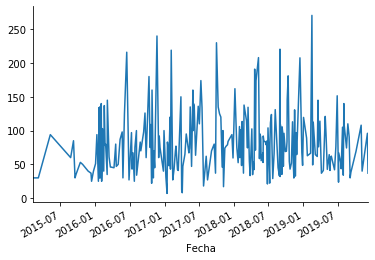

In [0]:
Grandwich['Kilos'].plot()
sns.despine()

juntando por meses y años, para intentar distinguir alguna periodicidad:

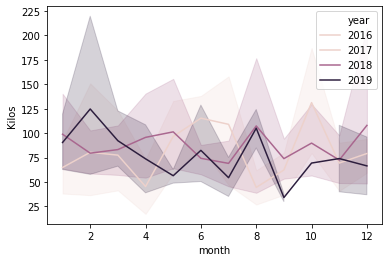

In [0]:
sns.lineplot('month','Kilos',hue='year',data=Grandwich['2017':'2019'], markers='None');

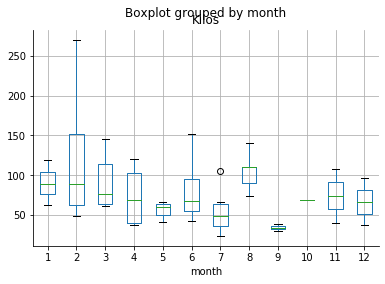

In [0]:
Grandwich['2019'].boxplot(column='Kilos',by='month')
sns.despine()

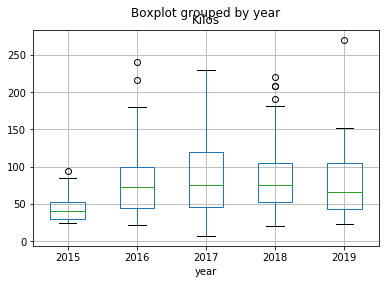

In [0]:
Grandwich.boxplot(column='Kilos',by='year');

Agregar latitudes y longitudes para una columna con direcciones

In [0]:
import geopy

In [0]:
dir(geopy)

['ArcGIS',
 'AzureMaps',
 'Baidu',
 'Bing',
 'DataBC',
 'GeoNames',
 'GeocodeEarth',
 'GeocodeFarm',
 'GoogleV3',
 'Here',
 'IGNFrance',
 'LiveAddress',
 'Location',
 'MapBox',
 'Nominatim',
 'OpenCage',
 'OpenMapQuest',
 'Pelias',
 'Photon',
 'PickPoint',
 'Point',
 'TomTom',
 'What3Words',
 'Yandex',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compat',
 'exc',
 'format',
 'geocoders',
 'get_geocoder_for_service',
 'location',
 'point',
 'units',
 'util']

In [0]:
from geopy.geocoders import Nominatim

In [0]:
nom = Nominatim()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [0]:
direccion_retiro = plato['dirección retiro'].dropna()
n = nom.geocode(direccion_retiro[0])

print(n.latitude, n.longitude)

35.1614859 -94.6032781


In [0]:
 plato['dirección retiro'].dropna().apply(nom.geocode)

In [0]:
dir_retiro_coordenadas